In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
%matplotlib inline

# Load and prepare the data

In [2]:
#Load
dataset = pd.DataFrame.from_csv('OutputTable.csv')

#Clean
dataset = dataset.reset_index()
dataset = dataset.drop('uniqRowID_2', axis=1)
dataset = dataset.set_index('uniqRowID_1')

#Shuffle
X = dataset.iloc[np.random.permutation(len(dataset))]

#Separate features and labels
Y = (X.GradeDiff > 0) * 1
X = X.drop(['GradeDiff','TimeSinceLast'], axis=1)

In [3]:
X.head()

,ProblemID,SubmissionNumber,NVideoEvents,NForumEvents,AverageVideoTimeDiffs,ForumActivity,DifferentVideos,NumberOfUpvotes,DurationOfVideoActivity,NumberOfThreadViews,Diff_Prob_Ini,Diff_Prob_Fin,Exp_Prob_GradeDiff,logTimeSinceLast
uniqRowID_1,,,,,,,,,,,,,,
e31fd58076d1113836027ab92762cc27_4_7,4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.927461,87.606218,12.247145,5.323010
647a07cdbf682014e63027a2eb33d441_8_25,8,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.386095,89.996302,8.557692,6.144186
3f8297afddb8928a8b24946b624551e0_7_4,7,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.199768,94.878049,15.135576,5.010635
a790e7638e4646edb8e8745d1eb62193_14_8,14,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.823853,89.807951,4.592268,6.228511
5c67352ab94cb3177b1a369a26c299fa_11_8,11,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.730917,93.739703,7.738509,5.303305


In [18]:
X.shape

(31985, 14)

In [30]:
X.columns

Index(['ProblemID', 'SubmissionNumber', 'NVideoEvents', 'NForumEvents',
       'AverageVideoTimeDiffs', 'ForumActivity', 'DifferentVideos',
       'NumberOfUpvotes', 'DurationOfVideoActivity', 'NumberOfThreadViews',
       'Diff_Prob_Ini', 'Diff_Prob_Fin', 'Exp_Prob_GradeDiff',
       'logTimeSinceLast'],
      dtype='object')

In [19]:
Y.value_counts()#.plot(kind = 'bar')

0    17924
1    14061
Name: GradeDiff, dtype: int64

Almost balanced classes

# Machine Learning

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import roc_auc_score
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

## 1. Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Initialization:
rf = RandomForestClassifier(n_estimators=500, max_depth=7)#, class_weight='balanced')

#Y_predicted = cross_val_predict(rf, X, Y, cv=10)
#confusion_matrix(y_true=Y, y_pred=Y_predicted)

In [23]:
scores = cross_val_score(rf, X, Y, scoring='roc_auc', cv=10)

mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.64444097935
7.14597816345e-05


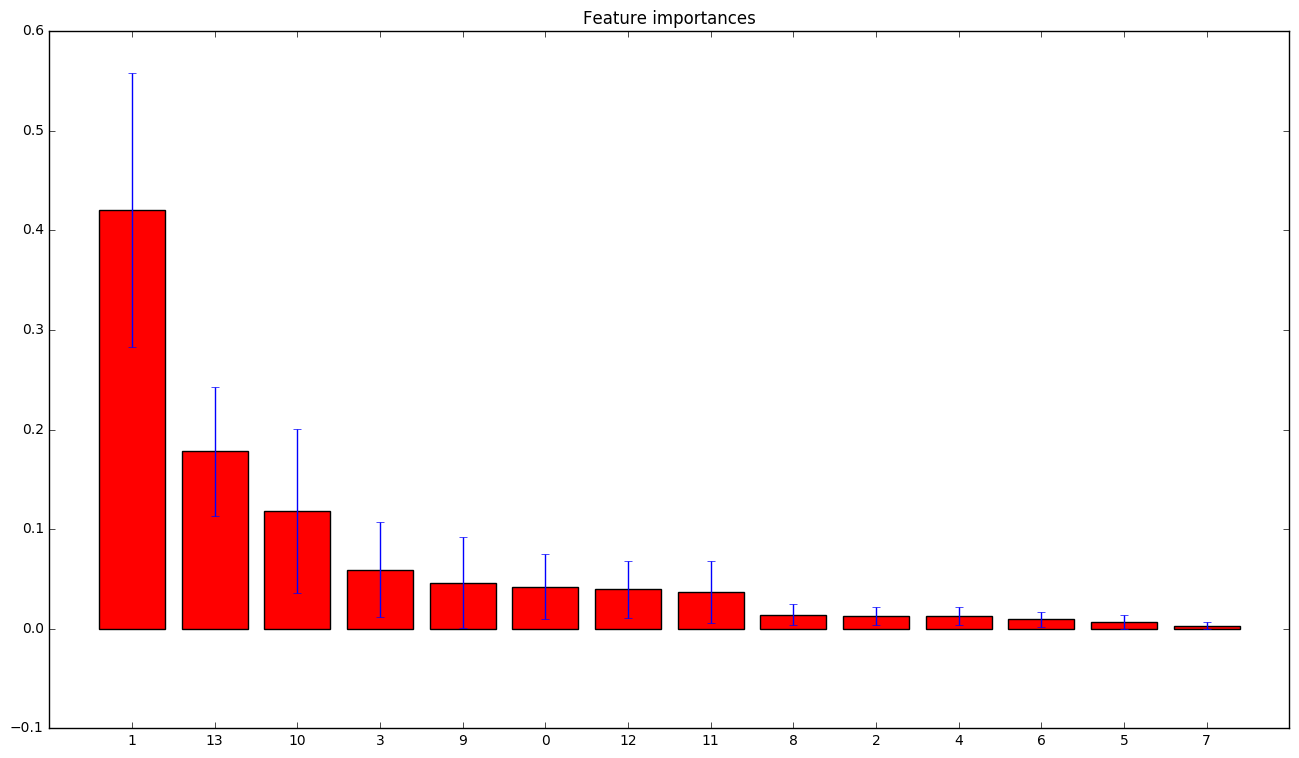

In [24]:
#Feature Importance

rf.fit(X,Y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]


# Plot the feature importances of the forest
f = np.asarray(X.columns.tolist())

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [32]:
f[[indices]]

array(['SubmissionNumber', 'logTimeSinceLast', 'Diff_Prob_Ini',
       'NForumEvents', 'NumberOfThreadViews', 'ProblemID',
       'Exp_Prob_GradeDiff', 'Diff_Prob_Fin', 'DurationOfVideoActivity',
       'NVideoEvents', 'AverageVideoTimeDiffs', 'DifferentVideos',
       'ForumActivity', 'NumberOfUpvotes'], 
      dtype='<U23')

In [5]:
X2 = X.ix[:,['SubmissionNumber', 'logTimeSinceLast', 'Diff_Prob_Ini']]

In [47]:
scores = cross_val_score(rf, X2, Y, scoring='roc_auc', cv=10)

mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.642481364242
6.03196800742e-05


## 2.Neural Networks

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
#Initialization:
nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(1000,100))

In [35]:
scores = cross_val_score(nn, X, Y, scoring='roc_auc', cv=5)
mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.630144870492
6.08263923083e-05


In [49]:
scores = cross_val_score(nn, X2, Y, scoring='roc_auc', cv=5)
mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.613366126743
7.16698903384e-05


In [ ]:
# #Balancing classes -> No improvement
# X['label'] = Y
# X0 = X.query('label==0')
# X1 = X.query('label==1')
# X = X.drop('label',axis=1)
# X_b = pd.concat([X1.ix[0:14000,:],X0.ix[0:14000,:]])
# X_b.iloc[np.random.permutation(len(X_b))]
# Y_b = X_b.label
# X_b = X_b.drop('label',axis=1)

# scores = cross_val_score(nn, X_b, Y_b, scoring='roc_auc', cv=5)
# mean_score = np.mean(scores)
# print(mean_score)
# var_score = np.var(scores)
# print(var_score)

In [59]:
#Initialization:
nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(40,10),learning_rate_init=0.001)

In [60]:
scores = cross_val_score(nn, X, Y, scoring='roc_auc', cv=5)
mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.631494468946
5.88194960379e-05


In [58]:
scores = cross_val_score(nn, X2, Y, scoring='roc_auc', cv=5)
mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.622313174653
4.25949389478e-05


In [38]:
#Initialization:
nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,40,10))

In [39]:
#Learning curve
train_sizes, train_scores, test_scores = learning_curve(nn, X, Y,
                                                        train_sizes=np.array([ 0.1, 0.33, 0.55, 0.78, 1. ]),
                                                        cv=5, scoring='roc_auc', exploit_incremental_learning=True)



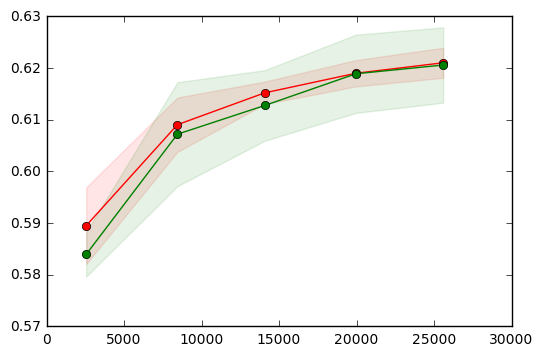

In [40]:
# Plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.show()

There is still plenty to learn, but not enough data!

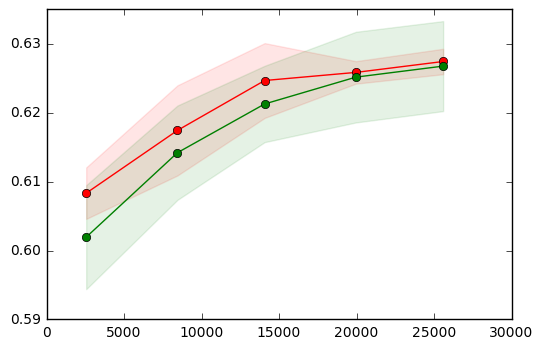

In [41]:
#Initialization:
nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,40,10), 
                   #learning_rate='adaptive', learning_rate_init=0.001,
                   alpha=0,tol=1e-4,batch_size=10)

#Learning curve
train_sizes, train_scores, test_scores = learning_curve(nn, stats.zscore(X), Y,
                                                        train_sizes=np.array([ 0.1, 0.33, 0.55, 0.78, 1. ]),
                                                        cv=5, scoring='roc_auc', exploit_incremental_learning=True)

# Plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.show()

Improvement with zscore

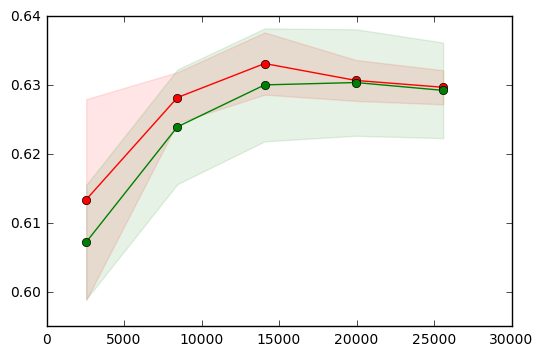

In [42]:
#Initialization:
nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(40,10), 
                   learning_rate_init=0.04, learning_rate='adaptive',
                   alpha=0.00001,tol=1e-10,batch_size=100)

#Learning curve
train_sizes, train_scores, test_scores = learning_curve(nn, stats.zscore(minmax_scale(X)), Y,
                                                        train_sizes=np.array([ 0.1, 0.33, 0.55, 0.78, 1. ]),
                                                        cv=5, scoring='roc_auc', exploit_incremental_learning=True)

# Plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.show()

Improvement with zscore after minmax_scale

## 4. K-NN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Initialization:
knn = KNeighborsClassifier(n_neighbors=201, algorithm='auto',weights='uniform',leaf_size=50)

scores = cross_val_score(knn, X, Y, scoring='roc_auc', cv=5)
mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.635205934637
5.08578890396e-05


In [50]:
scores = cross_val_score(knn, X2, Y, scoring='roc_auc', cv=5)
mean_score = np.mean(scores)
print(mean_score)
var_score = np.var(scores)
print(var_score)

0.636390197102
4.16657426986e-05


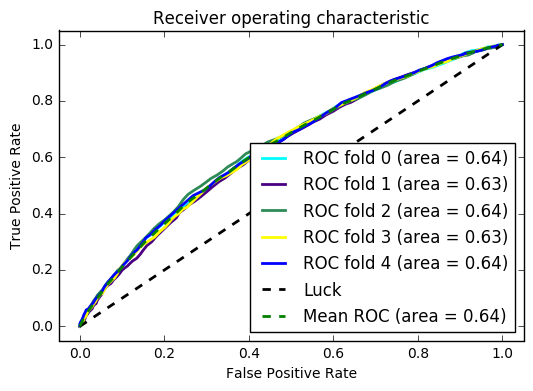

In [8]:
def roc_ploting(classifier, X, Y ):
    cv = StratifiedKFold(n_splits=5)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange','orange', 'red', 'purple', 'magenta'])
    lw = 2

    i = 0
    for (train, test), color in zip(cv.split(X, Y), colors):
        probas_ = classifier.fit(X.iloc[train], Y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(Y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color,
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    mean_tpr /= cv.get_n_splits(X, Y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

knn = KNeighborsClassifier(n_neighbors=201, algorithm='auto',weights='uniform',leaf_size=50)

roc_ploting(knn, X, Y)

## Generate labels:

In [135]:
#Load
dataset = pd.DataFrame.from_csv('OutputTable_test.csv')

#Clean
dataset = dataset.reset_index()
dataset = dataset.drop('uniqRowID_2', axis=1)
dataset = dataset.set_index('uniqRowID_1')

X_test = dataset.copy()

#Separate features and labels
X_test = X_test.drop(['GradeDiff','TimeSinceLast'], axis=1)

In [136]:
X_test.shape

(18888, 14)

In [137]:
X_test.columns

Index(['ProblemID', 'SubmissionNumber', 'NVideoEvents', 'NForumEvents',
       'AverageVideoTimeDiffs', 'ForumActivity', 'DifferentVideos',
       'NumberOfUpvotes', 'DurationOfVideoActivity', 'NumberOfThreadViews',
       'Diff_Prob_Ini', 'Diff_Prob_Fin', 'Exp_Prob_GradeDiff',
       'logTimeSinceLast'],
      dtype='object')

In [139]:
X_test2 = X_test.ix[:,['SubmissionNumber', 'logTimeSinceLast', 'Diff_Prob_Ini']]

In [140]:
# Defining the models
knn = KNeighborsClassifier(n_neighbors=201, algorithm='auto',weights='uniform',leaf_size=50)

rf = RandomForestClassifier(n_estimators=500, max_depth=7)

nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(40,10),learning_rate_init=0.001)

In [141]:
# Building a Meta-model
Y_predicted = list()
for classifier in [nn,knn,rf]:
    classifier.fit(X2,Y)
    Y_predicted.append(classifier.predict(X_test2))
    
Y_vote = stats.mode(np.array(Y_predicted))[0]

Select exactly what we want

In [142]:
X_test2['improved'] = Y_predicted[2] # Y_vote[0] or Y_predicted[i]
X_test2.head()

,SubmissionNumber,logTimeSinceLast,Diff_Prob_Ini,improved
uniqRowID_1,,,,
5b8b14f8786cdb2e76c58313219eab2a_0_1,1,5.420535,83.973128,1
5b8b14f8786cdb2e76c58313219eab2a_0_2,2,4.962845,83.973128,1
f458d6460e49ea8fddd02502a554d9f4_0_1,1,5.826000,83.973128,1
1f3cf1cc6de39a680480ad36534f5cab_0_1,1,12.462806,83.973128,1
1f3cf1cc6de39a680480ad36534f5cab_0_2,2,5.587249,83.973128,1


In [143]:
X_test3 = pd.DataFrame.from_csv('classifier_sampleResults.csv')
X_test3.head()

,improved
uniqRowID,
3038c17eb0ce9931fc27ac6e015ced6d_0_1,0
ba0fcffcfcea8c810970dfa4509cbc9c_0_1,0
9c5e154703a328527aec012787418b32_0_1,0
95a8908e60888df3c52d999a3977d595_0_5,0
17b46a6f879253c70ea7aaba260f417c_0_2,0


In [144]:
index1 = X_test2.index.intersection(X_test3.index)

predictions = X_test2.loc[index1][['improved']]
predictions['uniqRowID'] = predictions.index
predictions = predictions[['uniqRowID','improved']]
predictions.head()

,uniqRowID,improved
3038c17eb0ce9931fc27ac6e015ced6d_0_1,3038c17eb0ce9931fc27ac6e015ced6d_0_1,1
ba0fcffcfcea8c810970dfa4509cbc9c_0_1,ba0fcffcfcea8c810970dfa4509cbc9c_0_1,1
9c5e154703a328527aec012787418b32_0_1,9c5e154703a328527aec012787418b32_0_1,1
95a8908e60888df3c52d999a3977d595_0_5,95a8908e60888df3c52d999a3977d595_0_5,0
17b46a6f879253c70ea7aaba260f417c_0_2,17b46a6f879253c70ea7aaba260f417c_0_2,1


In [145]:
predictions.to_csv(path_or_buf='classifierResults.csv', sep=',', index=False, quoting=1)

#                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

#                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

#                                                                                                                                                                                                                                                                                                                                                                                

## 4. Other Things

We also tried with PCA, ICA, SVM (with different kernels), etc. But tried to keep the notebook as clean a possible removing what didn't really work

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(stats.zscore(minmax_scale(X)))
print(pca.explained_variance_ratio_) 
X_pca = pca.fit_transform(stats.zscore(minmax_scale(X)))

In [ ]:
#Initialization:
nn = MLPClassifier(activation='logistic',hidden_layer_sizes=(40,10), 
                   learning_rate_init=0.04, learning_rate='adaptive',
                   alpha=0.00001,tol=1e-10,batch_size=100)

In [ ]:
#Learning curve
train_sizes, train_scores, test_scores = learning_curve(nn, X_pca, Y,
                                                        train_sizes=np.array([ 0.1, 0.33, 0.55, 0.78, 1. ]),
                                                        cv=5, scoring='roc_auc', exploit_incremental_learning=True)


In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.show()

### Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture
X['logTimeSinceLast'] = np.log(X.TimeSinceLast)
n = 3
GM = GaussianMixture(n_components = n , max_iter = 1000, n_init = 3)
GM.fit( X.logTimeSinceLast.values.reshape((len(X.logTimeSinceLast.values),1)) )

In [ ]:
X['GaussianMixture'] = GM.predict( X.logTimeSinceLast.values.reshape((len(X.logTimeSinceLast.values),1))) 
X.head()

In [ ]:
def roc_ploting_multiclassifier(classifier, X, Y, normalize = True ):
    number_fold = 5
    cv = StratifiedKFold(n_splits = number_fold)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange','orange', 'red', 'purple', 'magenta'])
    lw = 2

    i = 1
    
    zip_variables= zip(cv.split(X[X['GaussianMixture'] == 0], Y[X['GaussianMixture'] == 0]),
                        cv.split(X[X['GaussianMixture'] == 1], Y[X['GaussianMixture'] == 1]),
                        cv.split(X[X['GaussianMixture'] == 2], Y[X['GaussianMixture'] == 2]),
                        colors)
    X = X.drop('GaussianMixture', 1)
    X = X.drop('TimeSinceLast', 1)
    if normalize:
        X = pd.DataFrame(stats.zscore(X), index = X.index, columns = X.columns)
    for (train_0, test_0), (train_1, test_1), (train_2, test_2), color in zip_variables:
        
        probas_ = classifier.fit(X.iloc[train_0], Y.iloc[train_0]).predict_proba(X.iloc[test_0])
        probas_ = np.concatenate((probas_, 
                                  classifier.fit(X.iloc[train_1], Y.iloc[train_1]).predict_proba(X.iloc[test_1])),
                                 axis=0) 
        probas_ = np.concatenate((probas_, 
                                  classifier.fit(X.iloc[train_2], Y.iloc[train_2]).predict_proba(X.iloc[test_2])),
                                 axis=0)
        
        tmp =  np.concatenate((test_0, test_1),
                              axis=0)
        tmp =  np.concatenate((tmp, test_2),
                              axis=0)
                                                                                         
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(Y.iloc[tmp], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=lw, color=color,
                 label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    mean_tpr /= cv.get_n_splits(X, Y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#With Neuronal Networks
roc_ploting_multiclassifier(MLPClassifier(activation = 'logistic', 
                                          hidden_layer_sizes = (40,10),
                                          learning_rate_init = 0.04, 
                                          learning_rate = 'adaptive',
                                          tol = 1e-10, batch_size = 100), 
                            X.copy(), 
                            Y)
#With Random Forest
roc_ploting_multiclassifier(RandomForestClassifier(n_estimators=500, 
                                                   max_depth = 7, 
                                                   class_weight = 'balanced'),
                            X.copy(), 
                            Y, 
                            normalize = False)
#With K-Nearest Neighbours
roc_ploting_multiclassifier(KNeighborsClassifier(n_neighbors=201, 
                                                 algorithm='auto',
                                                 weights='uniform',
                                                 leaf_size=50),
                            X.copy(),
                            Y)

### SVM Classifier

In [ ]:
#SVM Classifier with Linear Kernel
roc_ploting_multiclassifier(SVC(kernel='linear', probability=True),
                           X.copy(), Y)
#With Radial Basis Function Kernel (rbf)
roc_ploting_multiclassifier(SVC(kernel='rbf', probability=True),
                           X.copy(), Y)
#With Polynomial Kernel
roc_ploting_multiclassifier(SVC(kernel='poly', probability=True),
                           X.copy(), Y)